<a href="https://colab.research.google.com/github/Vivek084c/assignment/blob/main/part_1_project_4_26_12_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/household_power_consumption.csv")

# Explore the first few rows
df.head()

# Check for missing values
df.isnull().sum()

# Check the data types and summary statistics
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20351 entries, 0 to 20350
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  20351 non-null  int64  
 1   Date                   20351 non-null  object 
 2   Time                   20350 non-null  object 
 3   Global_active_power    20350 non-null  object 
 4   Global_reactive_power  20350 non-null  object 
 5   Voltage                20350 non-null  object 
 6   Global_intensity       20350 non-null  object 
 7   Sub_metering_1         20350 non-null  object 
 8   Sub_metering_2         20350 non-null  object 
 9   Sub_metering_3         20349 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 1.6+ MB


,index,Sub_metering_3
count,20351.000,20349.000000
mean,10175.000,6.873950
std,5874.972,8.527352
min,0.000,0.000000
25%,5087.500,0.000000
50%,10175.000,0.000000
75%,15262.500,17.000000
max,20350.000,19.000000


In [ ]:
# Convert 'Date' and 'Time' to datetime
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%y %H:%M:%S', dayfirst=True, errors='coerce')
#The format was adjusted to '%d/%m/%y' to handle two-digit years.
#dayfirst=True to explicitly tell it to parse dates with day first.
#errors='coerce' will set invalid parsing results to NaT (Not a Time), allowing processing to continue


# Drop original 'Date' and 'Time' columns
df = df.drop(columns=['Date', 'Time'])

# Handle missing values (e.g., filling with the median)
# Before you use median to fill NaN values, ensure DateTime is not included in the fill operation
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

In [ ]:
# Extract hour, day, and month from the 'Datetime' column
df['Hour'] = df['Datetime'].dt.hour
df['Day'] = df['Datetime'].dt.dayofweek
df['Month'] = df['Datetime'].dt.month
df['Year'] = df['Datetime'].dt.year

# You can also aggregate the data based on different periods (e.g., daily, weekly)
df['Day_of_Week'] = df['Datetime'].dt.day_name()


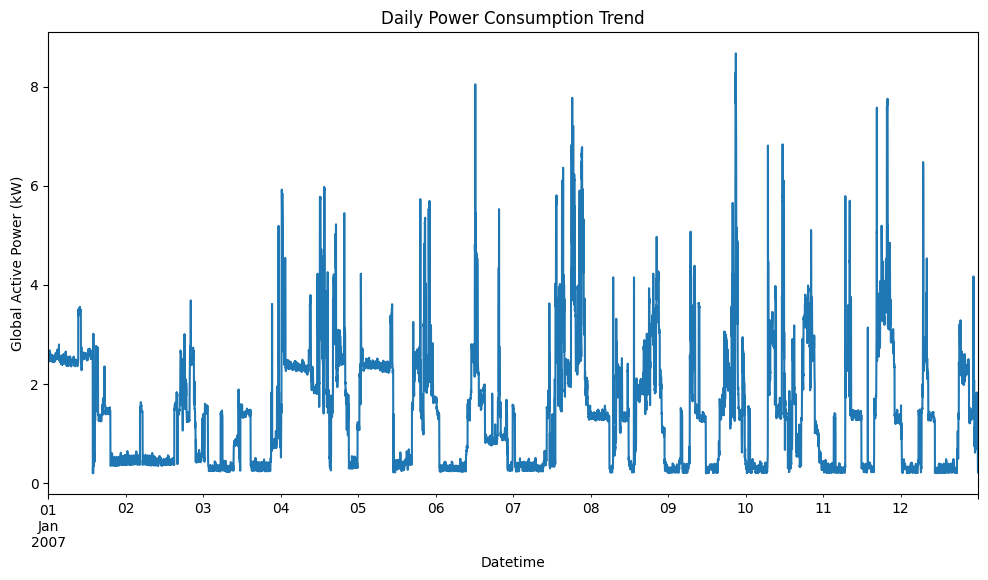

In [ ]:
# Convert 'Global_active_power' to numeric, handling errors
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

# Fill NaN values in 'Global_active_power' with the median
df['Global_active_power'] = df['Global_active_power'].fillna(df['Global_active_power'].median())

# Plot daily power consumption trend
df.groupby('Datetime')['Global_active_power'].sum().plot(figsize=(12, 6))
plt.title("Daily Power Consumption Trend")
plt.ylabel('Global Active Power (kW)')
plt.show()

In [ ]:
# Selecting relevant features
features = ['Global_active_power', 'Hour', 'Day_of_Week', 'Month', 'Year']
df_model = df[features]


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you're predicting 'Global_active_power' based on other features
X = df_model.drop('Global_active_power', axis=1)
y = df_model['Global_active_power']

# Split the data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Selecting relevant features
features = ['Global_active_power', 'Hour', 'Day_of_Week', 'Month', 'Year']
df_model = df[features]

# Convert 'Day_of_Week' to numerical representation using one-hot encoding
df_model = pd.get_dummies(df_model, columns=['Day_of_Week'], drop_first=True)
# drop_first=True to avoid multicollinearity

# Assuming you're predicting 'Global_active_power' based on other features
X = df_model.drop('Global_active_power', axis=1)
y = df_model['Global_active_power']

# Split the data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Assuming you're predicting 'Global_active_power' based on other features
X = df_model.drop('Global_active_power', axis=1)
y = df_model['Global_active_power']

# Split the data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an imputer to fill NaN values with the median
imputer = SimpleImputer(strategy='median') # Create an imputer instance

# Fit the imputer on the training data and transform both train and test data
X_train = imputer.fit_transform(X_train) # Fit and transform on training data
X_test = imputer.transform(X_test) # Transform test data using the fitted imputer

# Create and train a model (example: Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate performance
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE manually
rmse = mse**0.5  # or use np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

RMSE: 1.2397075050949358
R-squared: 0.09582831010471515


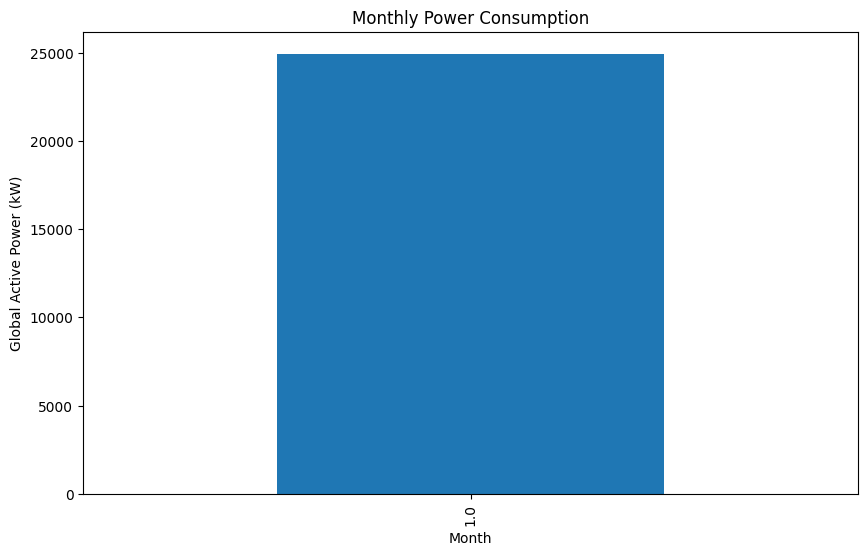

In [ ]:
# Look for seasonal patterns
monthly_consumption = df.groupby('Month')['Global_active_power'].sum()
monthly_consumption.plot(kind='bar', figsize=(10, 6))
plt.title("Monthly Power Consumption")
plt.ylabel('Global Active Power (kW)')
plt.show()


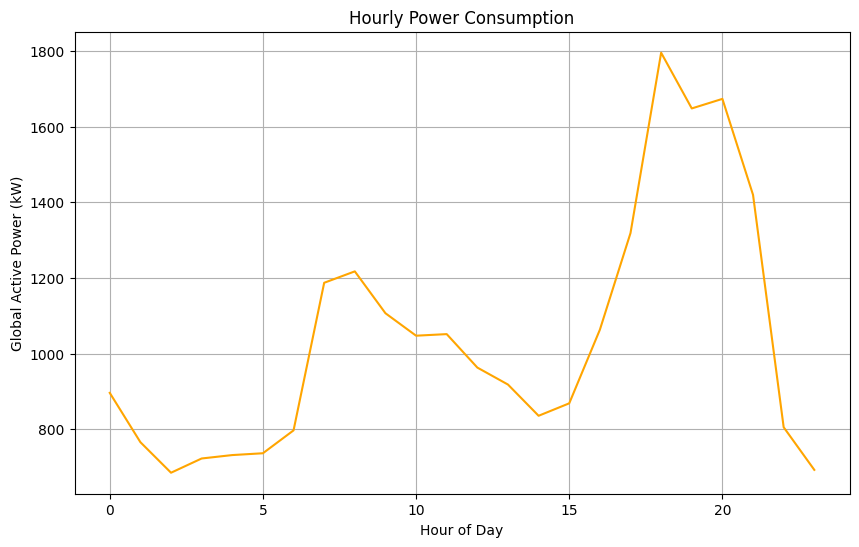

In [ ]:
# Group by Hour to analyze daily patterns
hourly_consumption = df.groupby('Hour')['Global_active_power'].sum()

# Plot hourly power consumption
hourly_consumption.plot(kind='line', figsize=(10, 6), color='orange')
plt.title("Hourly Power Consumption")
plt.ylabel('Global Active Power (kW)')
plt.xlabel('Hour of Day')
plt.grid(True)
plt.show()


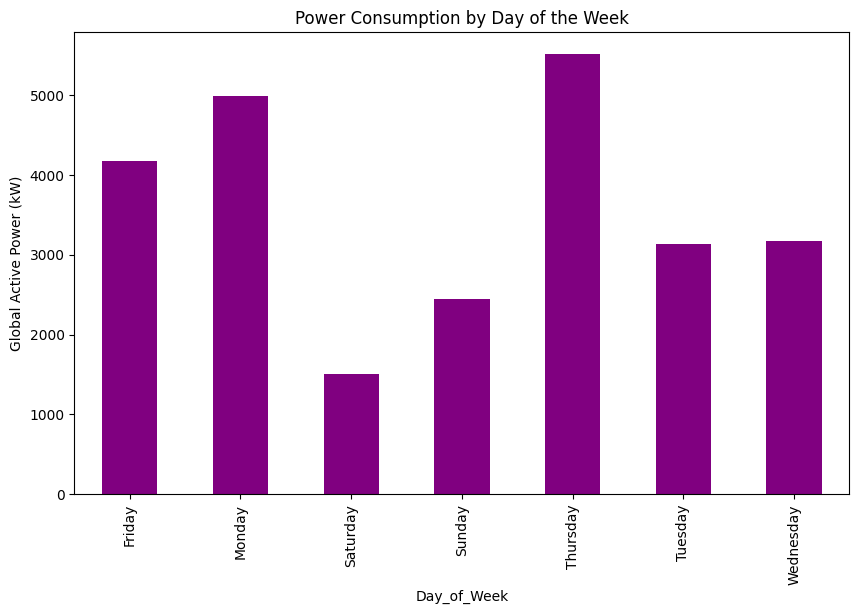

In [ ]:
# Group by Day of the Week to analyze weekly patterns
daily_consumption = df.groupby('Day_of_Week')['Global_active_power'].sum()

# Plot power consumption by day of the week
daily_consumption.plot(kind='bar', figsize=(10, 6), color='purple')
plt.title("Power Consumption by Day of the Week")
plt.ylabel('Global Active Power (kW)')
plt.show()


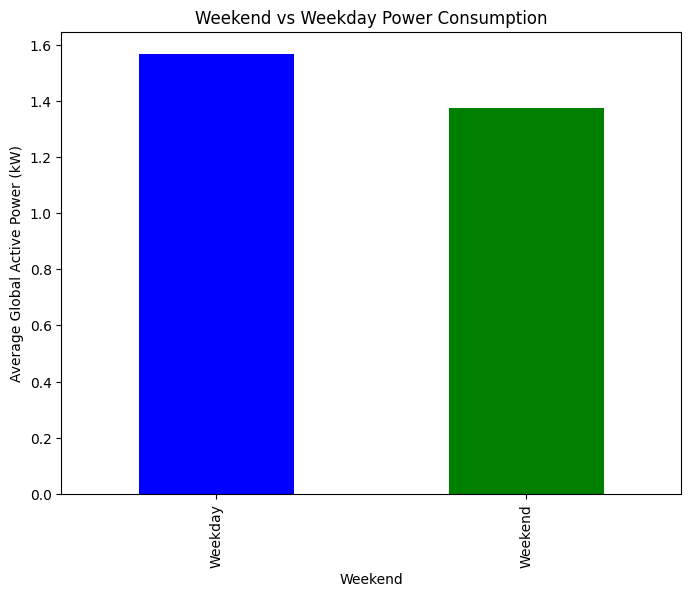

In [ ]:
# Create a new column to classify if a day is a weekend or weekday
df['Weekend'] = df['Day_of_Week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Group by 'Weekend' to analyze consumption patterns
weekend_weekday_consumption = df.groupby('Weekend')['Global_active_power'].mean()

# Plot comparison between weekend and weekday consumption
weekend_weekday_consumption.plot(kind='bar', figsize=(8, 6), color=['blue', 'green'])
plt.title("Weekend vs Weekday Power Consumption")
plt.ylabel('Average Global Active Power (kW)')
plt.show()


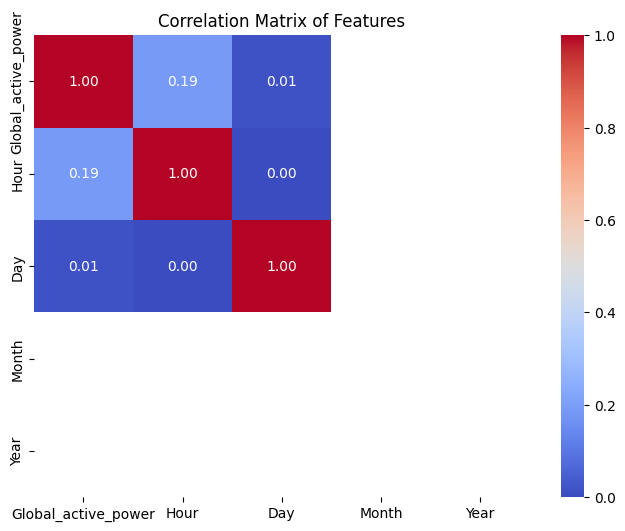

In [ ]:
# Compute the correlation matrix
correlation_matrix = df[['Global_active_power', 'Hour', 'Day', 'Month', 'Year']].corr()

# Plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt # Import Matplotlib

# Create a figure and axes object with the desired figsize
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the heatmap on the axes
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)

plt.title("Correlation Matrix of Features")
plt.show()

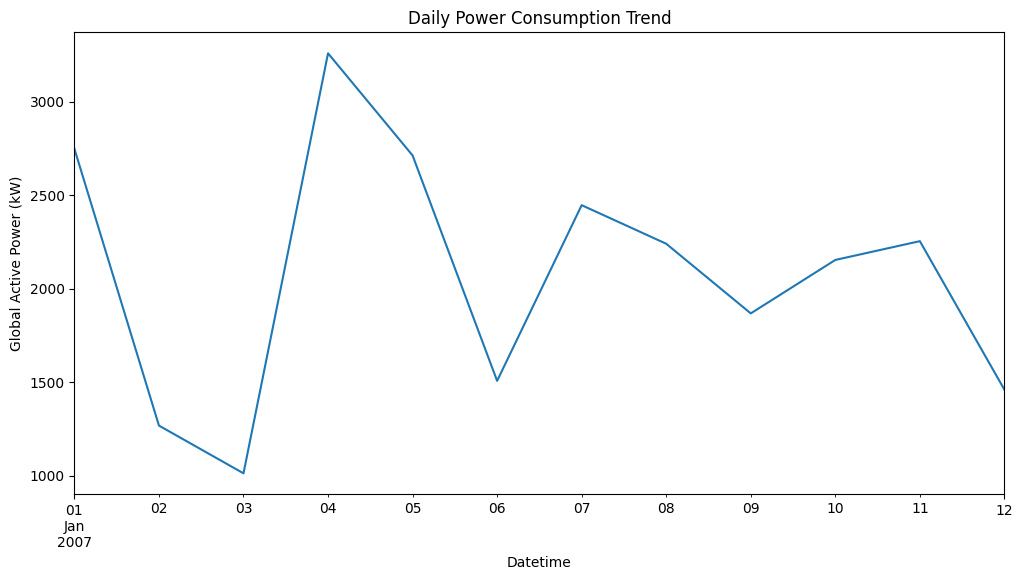

In [ ]:
# Resample the data to get daily consumption sums
df.set_index('Datetime', inplace=True)
daily_consumption = df['Global_active_power'].resample('D').sum()

# Plot the daily power consumption trend
daily_consumption.plot(figsize=(12, 6))
plt.title("Daily Power Consumption Trend")
plt.ylabel('Global Active Power (kW)')
plt.show()


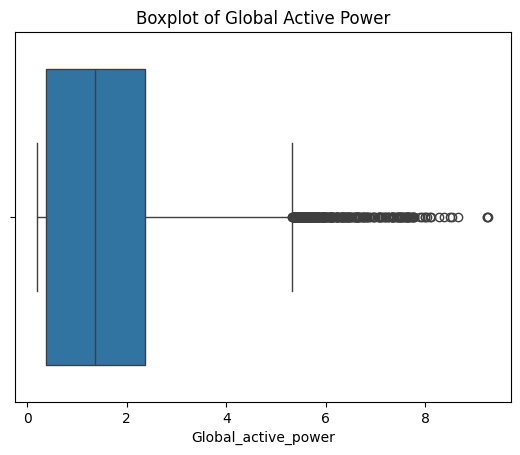

                     index  Global_active_power Global_reactive_power Voltage  \
Datetime                                                                        
2007-01-04 00:19:00   4339                5.756                 0.104  240.32   
2007-01-04 00:20:00   4340                5.886                 0.108  240.34   
2007-01-04 00:21:00   4341                5.922                  0.11  240.21   
2007-01-04 00:22:00   4342                5.850                  0.11  239.87   
2007-01-04 00:23:00   4343                5.738                 0.112  239.63   
...                    ...                  ...                   ...     ...   
NaT                  19794                5.742                 0.262  231.15   
NaT                  19795                5.538                 0.258  230.29   
NaT                  19798                5.530                 0.266   232.3   
NaT                  19801                5.812                 0.246  231.48   
NaT                  19806  

In [ ]:
# Plot power consumption distribution to identify outliers
sns.boxplot(x=df['Global_active_power'])
plt.title("Boxplot of Global Active Power")
plt.show()

# Detect outliers using the IQR method (Interquartile Range)
Q1 = df['Global_active_power'].quantile(0.25)
Q3 = df['Global_active_power'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Global_active_power'] < (Q1 - 1.5 * IQR)) | (df['Global_active_power'] > (Q3 + 1.5 * IQR))]
print(outliers)


<ipython-input-23-5924a61dd74f>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  consumption_by_level = df.groupby('Consumption_Level')['Global_active_power'].mean()


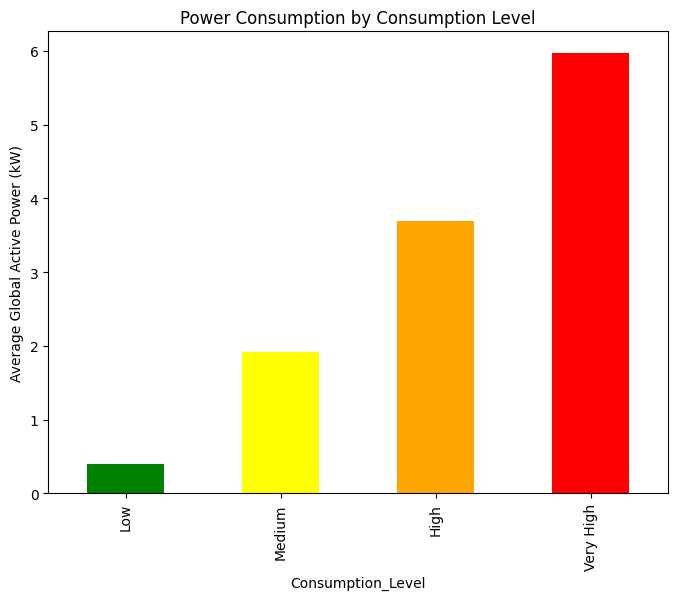

In [ ]:
# Define consumption thresholds for high, medium, low
df['Consumption_Level'] = pd.cut(df['Global_active_power'], bins=[0, 1, 3, 5, float('inf')],
                                  labels=['Low', 'Medium', 'High', 'Very High'])

# Group by 'Consumption_Level' to analyze behavior
consumption_by_level = df.groupby('Consumption_Level')['Global_active_power'].mean()

# Plot consumption by level
consumption_by_level.plot(kind='bar', figsize=(8, 6), color=['green', 'yellow', 'orange', 'red'])
plt.title("Power Consumption by Consumption Level")
plt.ylabel('Average Global Active Power (kW)')
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Che

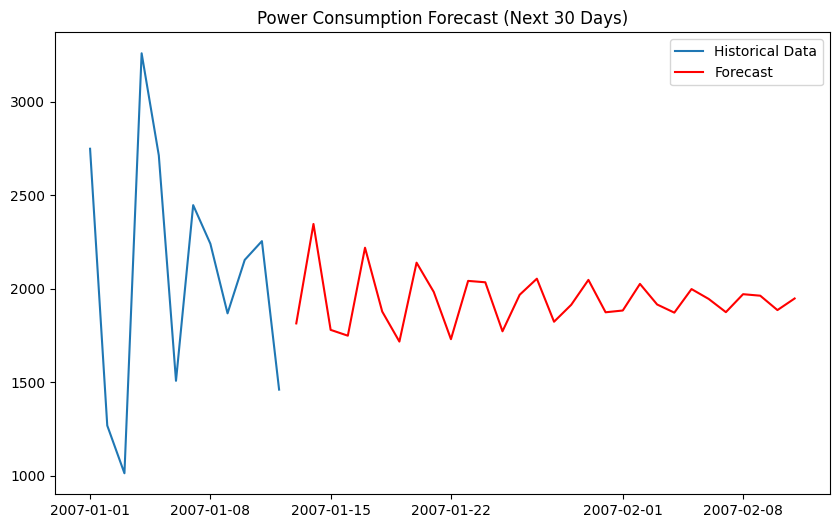

In [ ]:
# Example using ARIMA for time series forecasting
from statsmodels.tsa.arima.model import ARIMA

# Resample daily data
daily_consumption = df['Global_active_power'].resample('D').sum()

# Fit ARIMA model
model = ARIMA(daily_consumption, order=(5, 1, 0))  # Adjust order based on data
model_fit = model.fit()

# Forecast future values
forecast = model_fit.forecast(steps=30)  # Forecast the next 30 days

# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(daily_consumption, label='Historical Data')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Power Consumption Forecast (Next 30 Days)')
plt.legend()
plt.show()


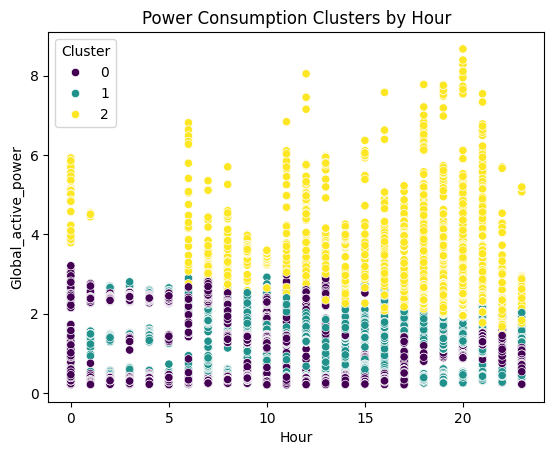

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import SimpleImputer for handling NaNs

# Select relevant features for clustering
X = df[['Global_active_power', 'Hour', 'Day']]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create an imputer to fill NaN values with the median (or other strategy)
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the scaled data and transform it
X_scaled = imputer.fit_transform(X_scaled)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Plot clusters
sns.scatterplot(x='Hour', y='Global_active_power', hue='Cluster', data=df, palette='viridis')
plt.title("Power Consumption Clusters by Hour")
plt.show()

<Axes: >

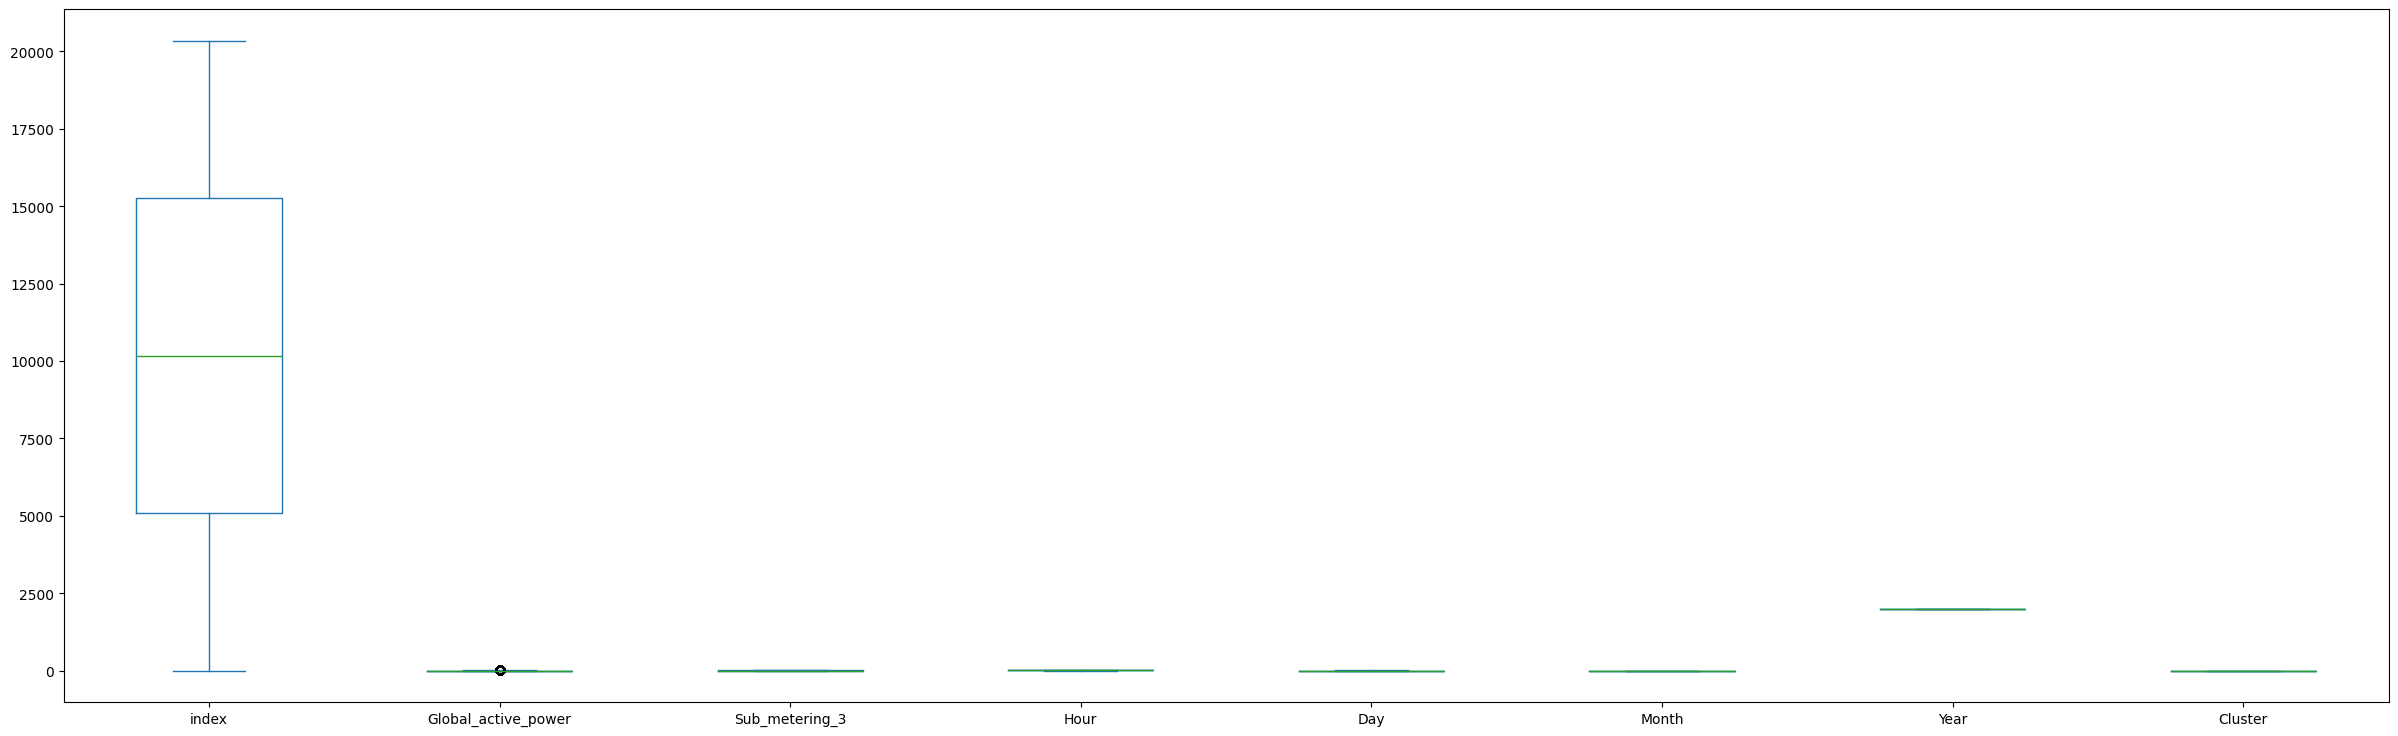

In [ ]:
fig, ax = plt.subplots(figsize=(30,9))
df.plot(kind='box',ax=ax) # Changed 'data' to 'df'

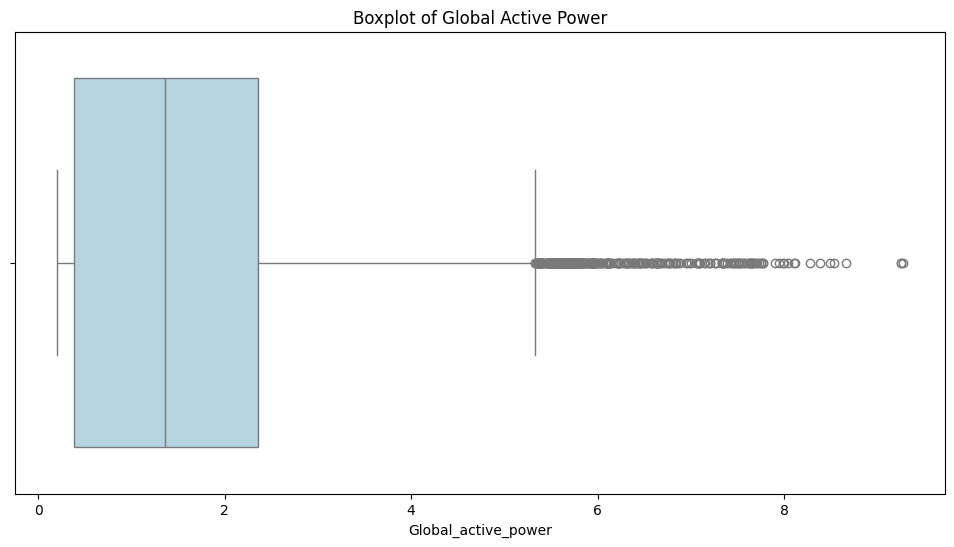

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Global_active_power'], color='lightblue')
plt.title('Boxplot of Global Active Power')
plt.show()


<ipython-input-33-07d7f61ce14e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Day_of_Week_Encoded'] = encoder.fit_transform(X['Day_of_Week'])


<Axes: xlabel='Hour', ylabel='Global_active_power'>

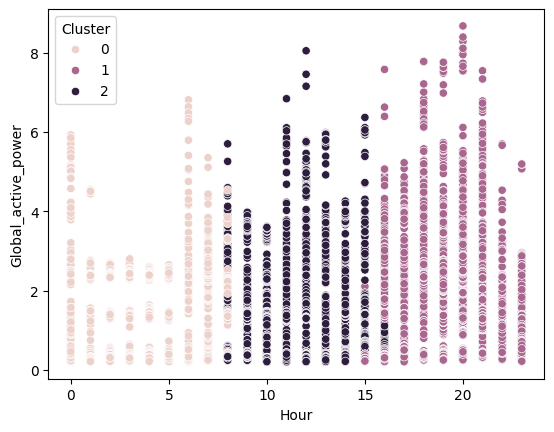

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder
from sklearn.impute import SimpleImputer # Import SimpleImputer for handling NaNs

kmeans = KMeans(n_clusters=3, random_state=42)

# Select relevant features for clustering
features = ['Global_active_power', 'Hour', 'Day_of_Week']
X = df[features]

# Create a LabelEncoder to convert 'Day_of_Week' to numerical
encoder = LabelEncoder()
X['Day_of_Week_Encoded'] = encoder.fit_transform(X['Day_of_Week'])

# Drop the original 'Day_of_Week' column
X = X.drop('Day_of_Week', axis=1)

# Create an imputer to fill NaN values with the median (or other strategy)
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the data and transform it
X = imputer.fit_transform(X)  # Impute missing values before applying KMeans

# Now you can apply KMeans
df['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
sns.scatterplot(x='Hour', y='Global_active_power', hue='Cluster', data=df)

<ipython-input-34-86c47861aa58>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  consumption_by_level = df.groupby('Consumption_Level')['Global_active_power'].mean()


<Axes: xlabel='Consumption_Level'>

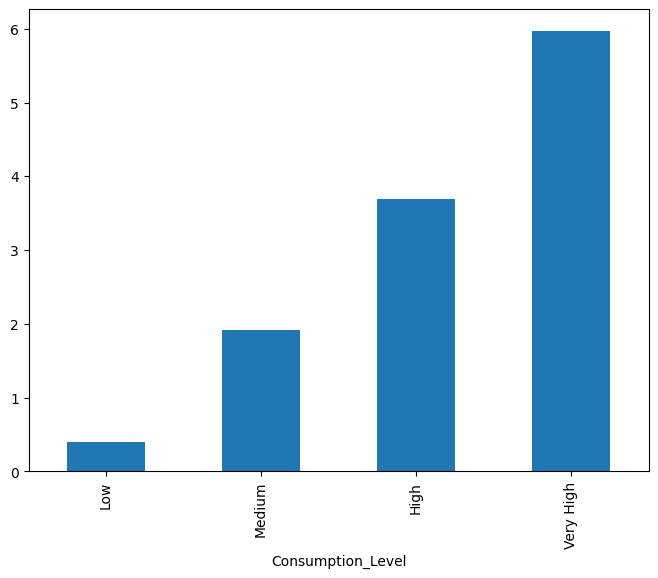

In [ ]:
# Segment by consumption levels (e.g., low, medium, high)
df['Consumption_Level'] = pd.cut(df['Global_active_power'], bins=[0, 1, 3, 5, float('inf')], labels=['Low', 'Medium', 'High', 'Very High'])

# Analyze consumption by level
consumption_by_level = df.groupby('Consumption_Level')['Global_active_power'].mean()
consumption_by_level.plot(kind='bar', figsize=(8, 6))
